In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

"""
Todo
Add multiplyer
Add put
"""

In [370]:
class OptionPosition:
    def __init__(self, spot_price):
        self.spot_price = spot_price
        self.stock_range = self.__create_range((0.8,1.2))
        self.positions = []
        
    def __create_range(self, _iv_range):
        _sr = np.arange(_iv_range[0]*self.spot_price, _iv_range[1]*self.spot_price, 1)
        _sr = np.floor(_sr)
        return _sr
    
    def add_call(self, strike_price, premium, long_short="long", multi=1):
        if long_short == "long": 
            _payoff = np.where(self.stock_range > strike_price, (self.stock_range - strike_price), 0) - premium
        else:
            _payoff = np.where(self.stock_range > strike_price, (strike_price - self.stock_range), 0) + premium        
        
        self.positions.append({"name": long_short.title()+" Call", "payoff": _payoff, "strike_price": strike_price, "premium": premium})
        
        _message = "Added a {} call position with strike at ${} for ${:.2f} premium".format(long_short, strike_price, float(premium))
        return _message
    
    def add_put(self, strike_price, premium, long_short="long", multi=1):
        if long_short == "long": 
            _payoff = np.where(self.stock_range < strike_price, (strike_price - self.stock_range), 0) - premium
        else:
            _payoff = np.where(self.stock_range < strike_price, (self.stock_range - strike_price), 0) + premium        
        
        self.positions.append({"name": long_short.title()+" Put", "payoff": _payoff, "strike_price": strike_price, "premium": premium})
        
        _message = "Added a {} put position with strike at ${} for ${:.2f} premium".format(long_short, strike_price, float(premium))
        return _message
    
    def __repr__(self):
        _positions = "Positions Created: \n"
        for pos in self.positions:
            _positions = _positions + str(pos) + '\n'
        return _positions
    
    def plot_all_payoffs(self):
        fig, ax = plt.subplots()
        plt.xlabel('Stock Price')
        plt.ylabel('P/L')
        ax.spines['bottom'].set_position('zero')
        for option in self.positions:
            _legend = "${:.1f} strike {} for ${:.2f}".format(float(option['strike_price']), option['name'],float(option['premium']))
            ax.plot(self.stock_range, option['payoff'], label=_legend)
        plt.legend()
        plt.show()
        
    def plot_tot_payoff(self):
        total_payoff = np.zeros_like(self.stock_range) # Create a blank P/L np array
        for option in self.positions:
            total_payoff = total_payoff + option["payoff"]
        print(total_payoff)
        fig, ax = plt.subplots()
        plt.xlabel('Stock Price')
        plt.ylabel('P/L')
        ax.spines['bottom'].set_position('zero')
#         _legend = "${:.1f} strike {} for ${:.2f}".format(float(option['strike_price']), option['name'],float(option['premium']))
        
        ax.plot(self.stock_range, total_payoff, label="P/L of strategy")
        plt.legend()
        plt.show()

In [371]:
rkt_vertical_debit = OptionPosition(200)
rkt_vertical_debit.stock_range

array([160., 161., 162., 163., 164., 165., 166., 167., 168., 169., 170.,
       171., 172., 173., 174., 175., 176., 177., 178., 179., 180., 181.,
       182., 183., 184., 185., 186., 187., 188., 189., 190., 191., 192.,
       193., 194., 195., 196., 197., 198., 199., 200., 201., 202., 203.,
       204., 205., 206., 207., 208., 209., 210., 211., 212., 213., 214.,
       215., 216., 217., 218., 219., 220., 221., 222., 223., 224., 225.,
       226., 227., 228., 229., 230., 231., 232., 233., 234., 235., 236.,
       237., 238., 239.])

In [372]:
rkt_vertical_debit.add_put(190, 3.78, "long")

'Added a long put position with strike at $190 for $3.78 premium'

In [373]:
rkt_vertical_debit.add_call(210, 4.31, "long")

'Added a long call position with strike at $210 for $4.31 premium'

In [374]:
rkt_vertical_debit

Positions Created: 
{'name': 'Long Put', 'payoff': array([26.22, 25.22, 24.22, 23.22, 22.22, 21.22, 20.22, 19.22, 18.22,
       17.22, 16.22, 15.22, 14.22, 13.22, 12.22, 11.22, 10.22,  9.22,
        8.22,  7.22,  6.22,  5.22,  4.22,  3.22,  2.22,  1.22,  0.22,
       -0.78, -1.78, -2.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78,
       -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78,
       -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78,
       -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78,
       -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78,
       -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78, -3.78]), 'strike_price': 190, 'premium': 3.78}
{'name': 'Long Call', 'payoff': array([-4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31,
       -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31,
       -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31, -4.31,
       -4.31, -4.31, -4.31, -4.31, -4.31, -4

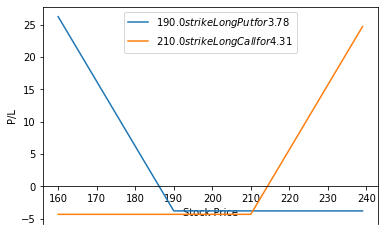

In [375]:
rkt_vertical_debit.plot_all_payoffs()

[21.91 20.91 19.91 18.91 17.91 16.91 15.91 14.91 13.91 12.91 11.91 10.91
  9.91  8.91  7.91  6.91  5.91  4.91  3.91  2.91  1.91  0.91 -0.09 -1.09
 -2.09 -3.09 -4.09 -5.09 -6.09 -7.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09
 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09 -8.09
 -8.09 -8.09 -8.09 -7.09 -6.09 -5.09 -4.09 -3.09 -2.09 -1.09 -0.09  0.91
  1.91  2.91  3.91  4.91  5.91  6.91  7.91  8.91  9.91 10.91 11.91 12.91
 13.91 14.91 15.91 16.91 17.91 18.91 19.91 20.91]


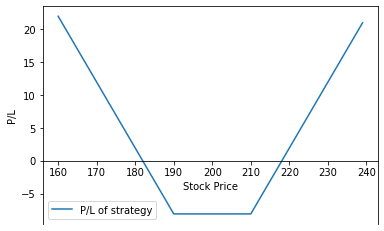

In [376]:
rkt_vertical_debit.plot_tot_payoff()